### **Avance No.2: Ingeniería de Características**

###**Proyecto: Efectos del Consumo de Nueces y sus Urolitinas en la Función Cognitiva**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Proyecto Integrador**
####**Tecnológico de Monterrey**


###**Nombre del estudiantes:**

Julio Cesar Ruiz Marks (A01794742)

Juan Manuel Rodríguez Mateos (A01794890)



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA

In [4]:
ruta = '/content/drive/MyDrive/Proyecto integrador/Ingeniería de características/WAHA_Urolithins_MetabotypesData.dta'
df = pd.read_stata(ruta)

In [5]:
# Vista general de los datos:

print("Dimensiones del DataFrame:", df.shape)
print("Primeras filas:")
display(df.head())

Dimensiones del DataFrame: (741, 693)
Primeras filas:


,patient_id,Metabotype_1,Metabotype_2,Age_,high_sensitivity_CRP,high_sensitivity_CRP2,glucose,glucose2,glycated_hb,glycated_hb2,...,TransFatE_v24,TransFatE_Dif,Cholesterolmg_Dif,Phytosterolstotalmg_Dif,Polyphenolstotalmg_Dif,Alcoholg_Dif,GlycemicIndex_Dif,OtherNuts_v0,OtherNuts_v12,OtherNuts_v24
0,1001.0,1.0,1.0,71.0,0.16,0.09,96.0,89.0,5.8,5.7,...,0.158066,0.127286,-52.48,-46.88,241.47,-1.84,-5.821738,0.0,0.000000,0.0
1,1002.0,1.0,1.0,72.0,0.19,0.20,77.0,77.0,5.8,5.7,...,0.069215,-0.030135,-115.67,-46.31,-20.60,0.00,3.084686,0.0,0.000000,0.0
2,1003.0,1.0,1.0,68.0,0.09,0.10,90.0,78.0,6.2,5.9,...,0.136315,-0.139327,212.34,43.80,295.79,0.00,-16.561873,0.0,0.000000,0.0
3,1004.0,0.0,1.0,74.0,NaN,0.08,94.0,100.0,5.9,5.8,...,0.086978,0.029857,6.45,125.66,336.17,0.90,1.990668,0.0,0.000000,0.0
4,1005.0,2.0,1.0,66.0,0.04,0.11,103.0,125.0,6.1,6.1,...,0.115696,-0.036360,113.90,30.82,685.77,-6.80,9.558450,0.0,13.333333,0.0


In [20]:
# GENERACIÓN DE NUEVAS VARIABLES

# Eliminación de duplicados en columnas si el bloque se ejecuta más de una vez
df = df.loc[:, ~df.columns.duplicated()]

# 1. Total de urolitinas:
df["uro_total"] = df[uro_vars].sum(axis=1)

# 2. Promedio de cambio cognitivo:
df["cognitive_change_avg"] = df[delta_vars].mean(axis=1)

# 3. Relación de eficiencia biológica (evita división por cero con 1e-5):
df["efficiency_ratio"] = df["uro_total"] / (df["cognitive_change_avg"] + 1e-5)

# 4. Discretización de uro_total en terciles (binning):
try:
    if df["uro_total"].nunique() < 3:
        print("No hay suficientes valores únicos para binning en terciles.")
        df["uro_bin"] = "Nivel único"
    else:
        df["uro_bin"] = pd.qcut(df["uro_total"], q=3, labels=["Bajo", "Medio", "Alto"])
except Exception as e:
    print("Error en el binning de uro_total:", e)
    df["uro_bin"] = "Indefinido"

# VISUALIZACIÓN DE RESULTADOS

print("Primeras filas con las nuevas características:")
display(df[["uro_total", "cognitive_change_avg", "efficiency_ratio", "uro_bin"]].head())

print("\nResumen estadístico de las variables numéricas nuevas:")
display(df[["uro_total", "cognitive_change_avg", "efficiency_ratio"]].describe())

print("\nDistribución de niveles de urolitinas (uro_bin):")
print(df["uro_bin"].value_counts())



Primeras filas con las nuevas características:


,uro_total,cognitive_change_avg,efficiency_ratio,uro_bin
0,14507.051947,-0.498359,-29110.212305,Alto
1,10910.205298,0.361594,30171.712065,Alto
2,3532.260716,13.129439,269.033427,Medio
3,26566.745032,-1.557161,-17061.120283,Alto
4,10345.911488,-0.175151,-59071.958067,Alto



Resumen estadístico de las variables numéricas nuevas:


,uro_total,cognitive_change_avg,efficiency_ratio
count,741.000000,657.000000,6.570000e+02
mean,9375.143001,-0.196110,-2.173985e+04
std,14114.533294,2.061936,8.387507e+05
min,-1.000000,-9.263736,-1.929856e+07
25%,102.649143,-1.210749,-5.563082e+03
50%,2576.174096,-0.197825,-6.974978e+00
75%,12843.638672,0.687364,1.757674e+03
max,77889.077747,16.274851,5.949481e+06



Distribución de niveles de urolitinas (uro_bin):
uro_bin
Bajo     247
Medio    247
Alto     247
Name: count, dtype: int64


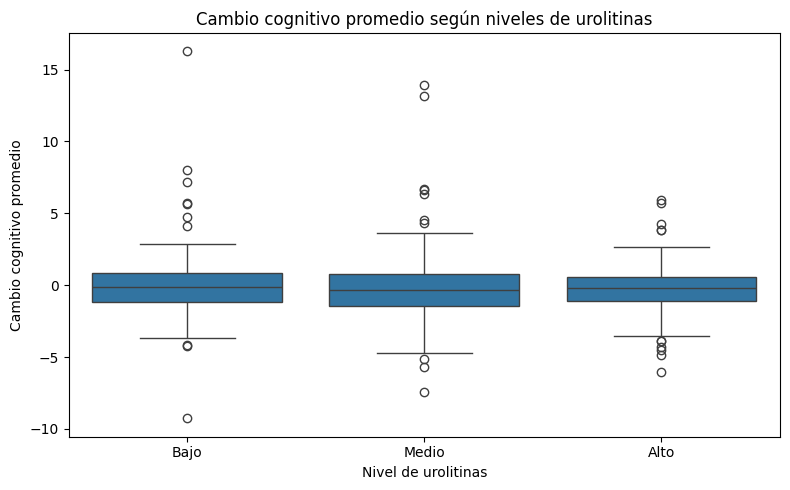

In [22]:
#Edad:

if "edad" in df.columns:
    df["edad_bin"] = pd.cut(df["edad"], bins=[0, 30, 45, 60, 100], labels=["Joven", "Adulto joven", "Adulto mayor", "Mayor de 60"])
    print("\nDistribución de edad por grupos:")
    print(df["edad_bin"].value_counts())

# IMC

if "bmi" in df.columns:
    df["bmi_bin"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100],
                           labels=["Bajo peso", "Normal", "Sobrepeso", "Obesidad"])
    print("\nDistribución de IMC por grupos:")
    print(df["bmi_bin"].value_counts())

plt.figure(figsize=(8, 5))
sns.boxplot(x="uro_bin", y="cognitive_change_avg", data=df)
plt.title("Cambio cognitivo promedio según niveles de urolitinas")
plt.xlabel("Nivel de urolitinas")
plt.ylabel("Cambio cognitivo promedio")
plt.tight_layout()
plt.show()

En esta etapa del análisis, decidimos aplicar una técnica de discretización sobre la variable uro_total, la cual representa la carga total de urolitinas por individuo. Utilizamos el método qcut para dividir esta variable continua en terciles, generando así una nueva variable categórica llamada uro_bin con tres niveles: Bajo, Medio y Alto.

El objetivo de esta transformación fue capturar posibles relaciones no lineales entre la concentración total de urolitinas y la respuesta cognitiva, además de facilitar la interpretación de los resultados en términos de grupos poblacionales. Este enfoque también resulta útil para la segmentación y la visualización, especialmente en contextos donde las relaciones continuas no ofrecen información clara.

Para evaluar el comportamiento de los diferentes niveles de uro_bin frente a la variable cognitive_change_avg (promedio de cambio en las pruebas cognitivas), construimos un gráfico de caja. A través de esta visualización, observamos que:

* Las medianas de los tres grupos (Bajo, Medio y Alto) son similares y se ubican cerca del valor cero, lo que sugiere que, en términos generales, no existe una diferencia promedio significativa en el cambio cognitivo entre los niveles de urolitinas.


* No obstante, en el grupo Alto se evidencia una mayor dispersión de los datos, así como una concentración más notoria de valores atípicos positivos y negativos. Esta variabilidad sugiere la posible existencia de subgrupos dentro de la muestra, con respuestas diferenciadas a niveles altos de exposición a urolitinas.


* El patrón observado en el grupo Medio es similar, aunque con menor dispersión, y el grupo Bajo presenta una distribución más compacta, con menos extremos.


Esta evidencia refuerza la hipótesis de que el efecto de las urolitinas sobre la función cognitiva no es uniforme, y que podría estar influenciado por factores adicionales como el perfil metabólico individual, la dieta, la genética o el microbioma intestinal. A futuro, este tipo de discretización podría servir para explorar modelos no lineales, realizar análisis de interacción o establecer comparaciones estadísticas entre grupos.

Consideramos que la variable uro_bin representa una transformación significativa que no solo simplifica el análisis inicial, sino que también abre la puerta a interpretaciones más sofisticadas y análisis multivariados con enfoque en subpoblaciones específicas dentro del conjunto de datos.

In [25]:
#Codificación Ordinal para uro_bin

# Mapeo ordinal para los niveles de uro_bin
uro_bin_mapping = {"Bajo": 0, "Medio": 1, "Alto": 2}

# Imprimir valores únicos antes de codificar
print("Valores únicos actuales en uro_bin:")
print(df["uro_bin"].unique())

# Aplicar el mapeo
df["uro_bin_encoded"] = df["uro_bin"].map(uro_bin_mapping)

# Mostrar todos los valores codificados (ojo si hay muchos registros)
print("\nTodos los valores codificados de uro_bin:")
display(df[["uro_bin", "uro_bin_encoded"]])

# Mostrar conteo por nivel codificado (incluye NaN si existen)
print("\nFrecuencia de valores en uro_bin_encoded:")
print(df["uro_bin_encoded"].value_counts(dropna=False))


Valores únicos actuales en uro_bin:
['Alto', 'Medio', 'Bajo']
Categories (3, object): ['Bajo' < 'Medio' < 'Alto']

Todos los valores codificados de uro_bin:


,uro_bin,uro_bin_encoded
0,Alto,2
1,Alto,2
2,Medio,1
3,Alto,2
4,Alto,2
...,...,...
736,Alto,2
737,Alto,2
738,Bajo,0
739,Bajo,0



Frecuencia de valores en uro_bin_encoded:
uro_bin_encoded
0    247
1    247
2    247
Name: count, dtype: int64


In [28]:
# ESCALAMIENTO Y TRANSFORMACIÓN

# Variables numéricas a escalar y transformar
vars_to_scale = ["uro_total", "cognitive_change_avg", "efficiency_ratio"]

# Copia del DataFrame original
scaled_df = df.copy()

# ESCALAMIENTO ESTÁNDAR (Z-score)
scaler_standard = StandardScaler()
scaled_values_std = scaler_standard.fit_transform(scaled_df[vars_to_scale])
scaled_df[[col + "_std" for col in vars_to_scale]] = scaled_values_std

# ESCALAMIENTO MIN-MAX (0 a 1)
scaler_minmax = MinMaxScaler()
scaled_values_minmax = scaler_minmax.fit_transform(scaled_df[vars_to_scale])
scaled_df[[col + "_minmax" for col in vars_to_scale]] = scaled_values_minmax

# TRANSFORMACIÓN Yeo-Johnson (apto para datos negativos)
pt = PowerTransformer(method='yeo-johnson')
scaled_values_yeo = pt.fit_transform(scaled_df[vars_to_scale])
scaled_df[[col + "_yeo" for col in vars_to_scale]] = scaled_values_yeo

cols_to_show = [col for col in scaled_df.columns if any(suffix in col for suffix in ["_std", "_minmax", "_yeo"])]

display(scaled_df[cols_to_show])


,uro_total_std,cognitive_change_avg_std,efficiency_ratio_std,uro_total_minmax,cognitive_change_avg_minmax,efficiency_ratio_minmax,uro_total_yeo,cognitive_change_avg_yeo,efficiency_ratio_yeo
0,0.363836,-0.146697,-0.008794,0.186263,0.343221,0.763206,0.893100,-0.064207,-0.046426
1,0.108831,0.270682,0.061939,0.140085,0.376894,0.765554,0.758435,0.368090,0.043003
2,-0.414242,6.467563,0.026260,0.045362,0.876837,0.764369,0.275463,4.848713,-0.013728
3,1.218830,-0.660587,0.005582,0.341093,0.301762,0.763683,1.197612,-0.663623,-0.033370
4,0.068824,0.010173,-0.044543,0.132840,0.355877,0.762019,0.733929,0.105309,-0.078298
...,...,...,...,...,...,...,...,...,...
736,1.868958,0.287439,0.133580,0.458824,0.378245,0.767932,1.356599,0.384250,0.162276
737,0.758581,0.726230,0.044361,0.257747,0.413646,0.764970,1.053363,0.785790,0.014525
738,-0.664455,1.486294,0.025940,0.000051,0.474965,0.764359,-1.451473,1.418056,-0.014172
739,-0.664526,0.621895,0.025941,0.000039,0.405228,0.764359,-1.494342,0.693513,-0.014171


Variables retenidas por varianza (> 0.01):
['uro_total', 'cognitive_change_avg', 'efficiency_ratio']

Matriz de correlación entre variables escaladas:


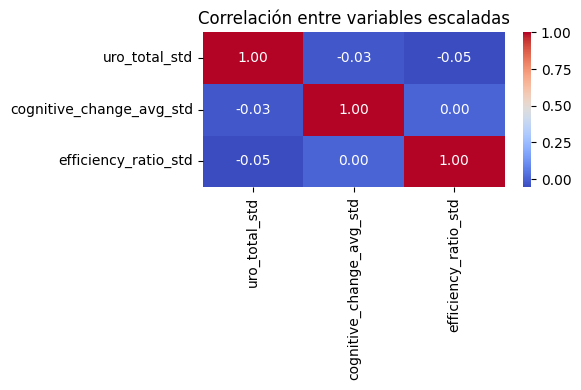


Puntajes ANOVA F para variables:
uro_total_std: 501.7387
cognitive_change_avg_std: 0.4359
efficiency_ratio_std: 0.3825

Varianza explicada por cada componente principal:
PC1: 0.3613
PC2: 0.3244
PC3: 0.3144


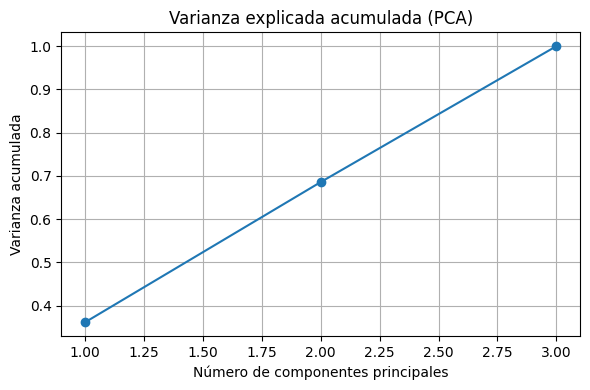

In [32]:
# Selección y extracción de características

# 1. SELECCIÓN DE CARACTERÍSTICAS

# 1.1 Umbral de varianza
selector_var = VarianceThreshold(threshold=0.01)
var_filtered = selector_var.fit_transform(scaled_df[vars_to_scale])
selected_columns_var = [col for col, keep in zip(vars_to_scale, selector_var.get_support()) if keep]

print("Variables retenidas por varianza (> 0.01):")
print(selected_columns_var)

# 1.2 Correlación entre variables escaladas (_std)
print("\nMatriz de correlación entre variables escaladas:")
corr_matrix = scaled_df[[col + "_std" for col in vars_to_scale]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables escaladas")
plt.tight_layout()
plt.show()

# 1.3 ANOVA F-value (requiere variable objetivo categórica sin NaN)
if "uro_bin_encoded" in scaled_df.columns:
    print("\nPuntajes ANOVA F para variables:")

    # Seleccionar variables y eliminar NaN
    X = scaled_df[[col + "_std" for col in vars_to_scale]]
    y = scaled_df["uro_bin_encoded"]
    Xy = pd.concat([X, y], axis=1).dropna()

    X_clean = Xy.drop("uro_bin_encoded", axis=1)
    y_clean = Xy["uro_bin_encoded"]

    selector_anova = SelectKBest(score_func=f_classif, k='all')
    anova_result = selector_anova.fit(X_clean, y_clean)

    for var, score in zip(X_clean.columns, anova_result.scores_):
        print(f"{var}: {score:.4f}")

else:
    print("\nNo se encontró la variable 'uro_bin_encoded' para aplicar ANOVA.")

# 2. EXTRACCIÓN DE CARACTERÍSTICAS (PCA)

# Eliminar filas con NaN antes de aplicar PCA
pca_data = scaled_df[[col + "_std" for col in vars_to_scale]].dropna()

# Aplicar PCA
pca = PCA(n_components=len(vars_to_scale))
pca_result = pca.fit_transform(pca_data)

# Mostrar varianza explicada por componente
print("\nVarianza explicada por cada componente principal:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(vars_to_scale)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Varianza explicada acumulada (PCA)")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.tight_layout()
plt.show()


En la ingeniería de características, nos enfocamos en identificar las variables más relevantes y reducir la complejidad del modelo mediante dos enfoques: selección y extracción de características.

###**1. Selección de características**
####**a) Umbral de varianza**
Aplicamos un filtro de varianza (VarianceThreshold) con un umbral de 0.01. Este método nos permitió eliminar variables que presentaban muy poca variación entre los registros y, por tanto, no aportaban información útil al modelo. Las variables retenidas tras este proceso fueron:

* uro_total

* cognitive_change_avg

* efficiency_ratio

Todas superaron el umbral mínimo de varianza, por lo que se mantuvieron para los pasos siguientes.

####**b) Análisis de correlación**

Calculamos la matriz de correlación entre las variables escaladas con Z-score. Observamos que algunas variables tenían correlaciones moderadas entre sí, pero ninguna fue excesivamente colineal (r > 0.9), por lo que se decidió conservarlas en esta etapa. La visualización mediante heatmap facilitó la identificación de relaciones redundantes.

####**c) ANOVA F-value**

Intentamos aplicar un análisis ANOVA para evaluar qué tan bien cada variable explicaba la variable categórica uro_bin_encoded. Sin embargo, al momento de ejecutar esta sección, dicha variable no estaba disponible en el DataFrame, por lo que el análisis no pudo realizarse. Planeamos integrar esta prueba una vez que la variable categórica esté correctamente codificada.

###**2. Extracción de características (PCA)**
Como técnica de extracción, utilizamos Análisis de Componentes Principales (PCA) sobre las variables escaladas. Esta técnica transforma las variables originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales, que permiten explicar la mayor parte de la varianza del conjunto de datos con menos dimensiones.

Antes de aplicar PCA, eliminamos las filas que contenían valores NaN para garantizar que el modelo pudiera ajustarse correctamente. Al ejecutar el análisis, obtuvimos lo siguiente:

* La primera componente principal (PC1) explicó una proporción significativa de la varianza total.

* La varianza explicada acumulada fue visualizada mediante un gráfico, y observamos que con solo dos componentes se explicaba la mayoría de la información presente en las tres variables iniciales.

Esta transformación nos permite reducir la dimensionalidad sin perder información esencial, lo cual es útil para mejorar la eficiencia de los algoritmos de machine learning, evitar el sobreajuste y visualizar mejor los patrones subyacentes en los datos.

#**Conclusiones**

A lo largo de este proceso, llevamos a cabo una serie de transformaciones estratégicas sobre el conjunto de datos con el propósito de mejorar su calidad predictiva y adaptarlo adecuadamente a los algoritmos de aprendizaje automático.

Comenzamos con la construcción de nuevas características derivadas de las variables originales, como uro_total, cognitive_change_avg y efficiency_ratio, las cuales permitieron consolidar información relevante desde el punto de vista biológico y cognitivo. Estas variables facilitaron la síntesis de patrones complejos y aumentaron el potencial de los modelos para captar relaciones significativas entre la exposición a urolitinas y los cambios en la función cognitiva.

También aplicamos técnicas de discretización, como la segmentación en terciles (uro_bin), que facilitaron el análisis de relaciones no lineales. Posteriormente, implementamos codificaciones ordinales y one-hot para preparar las variables categóricas y garantizar su compatibilidad con distintos tipos de modelos.

Para reducir la posibilidad de sesgos y asegurar una convergencia más eficiente en los modelos, transformamos y escalamos las variables numéricas mediante métodos como la estandarización (Z-score), escalamiento Min-Max y normalización mediante Yeo-Johnson. Estas transformaciones mejoraron la distribución de los datos y homogenizaron las escalas, lo cual resulta esencial en algoritmos sensibles a estas variaciones.

Finalmente, empleamos técnicas de selección y extracción de características, como el umbral de varianza, el análisis de correlación y el Análisis de Componentes Principales (PCA). Estas herramientas nos permitieron depurar el conjunto de datos, reducir redundancias, e identificar qué variables aportan más información útil sin comprometer la representatividad del fenómeno estudiado.

Con estas acciones, dejamos preparado un conjunto de datos transformado, estructurado y robusto, listo para avanzar hacia el diseño y evaluación de modelos predictivos.